In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [72]:
# Setting a path that can be used both on colab and a local repository such as a laptop
# Determine the environment (Colab or local)
if 'google.colab' in str(get_ipython()):
    # Running in Colab
    base_path = Path('/content/drive/MyDrive/Data_Repos/car_price_prediction')
else:
    # Running on local machine
  base_path = Path('.')

file_path = base_path/'data'/'USA_cars_datasets.csv'

In [73]:
#Reading the dataset into the notebook
cars_df = pd.read_csv(file_path)

In [74]:
cars_df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [75]:
cars_df.drop(columns='Unnamed: 0', axis=1, inplace=True);

In [76]:
cars_df.head(30)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [77]:
#Checking for duplicates
cars_df.loc[cars_df.duplicated()]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


In [78]:
#Checking for missing values
cars_df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

## Exploratory Analysis

In [79]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [80]:
cars_df.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [81]:
cars_df.shape

(2499, 12)

In [82]:
# Checking for duplicates with 'vin column'
cars_df.loc[cars_df.duplicated(subset = 'vin')]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
518,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,17 hours left
530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left
661,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left


In [83]:
#Dropping duplicated rows
cars_df.drop_duplicates(subset='vin', inplace=True);

In [84]:
# Resetting index
cars_df.reset_index(drop=True, inplace=True)
# checking the shape of the data after dropping duplicates
cars_df.shape

(2495, 12)

In [85]:
# Changing the data type of the date column
cars_df['year'] = cars_df['year'].astype(str)

In [86]:
#Getting the descriptive statistics of the numerical features
cars_df.describe(exclude='object')

,price,mileage,lot
count,2495.000000,2.495000e+03,2.495000e+03
mean,18786.948297,5.215852e+04,1.676914e+08
std,12107.260299,5.960507e+04,2.040277e+05
min,0.000000,0.000000e+00,1.593488e+08
25%,10297.500000,2.140550e+04,1.676253e+08
50%,16900.000000,3.532600e+04,1.677451e+08
75%,25555.500000,6.335450e+04,1.677798e+08
max,84900.000000,1.017936e+06,1.678055e+08


In [87]:
# Descriptive statistics for categorical features
cars_df.describe(exclude=['int64','float64'])

,brand,model,year,title_status,color,vin,state,country,condition
count,2495,2495,2495,2495,2495,2495,2495,2495,2495
unique,28,127,30,2,49,2495,44,2,47
top,ford,door,2019,clean vehicle,white,jtezu11f88k007763,pennsylvania,usa,2 days left
freq,1235,649,892,2335,706,1,299,2488,832


## Creating Visualizations

### Univariate analysis

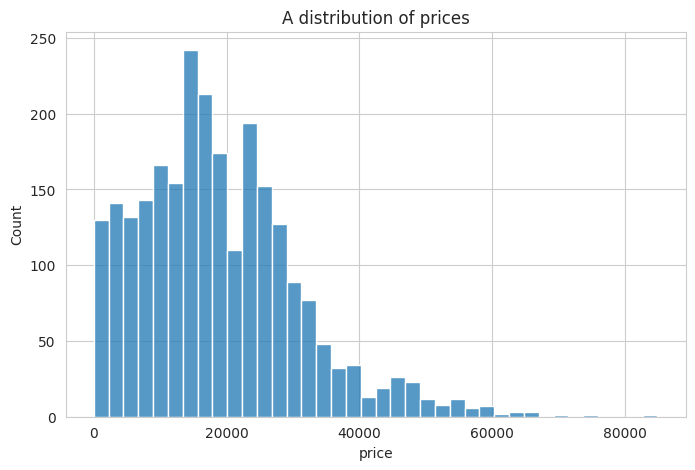

In [88]:
#Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(cars_df['price']).set(title='A distribution of prices');

<p>The price distribution of cars in the dataset is skewed to the right. This implies that most of the <br>cars have lower prices, but there are relatively few cars with very high prices.</p>

Some cars in the dataset seem to have prices to be 0. those rows will be dropped from the dataset

In [89]:
cars_df[cars_df['price']==0].shape

(42, 12)

In [90]:
# Selecting all entries where price is not equal to zero
cars_df = cars_df[cars_df['price'] != 0]
cars_df.reset_index(drop=True, inplace=True)

### Most cars in the dataset are cars from ford

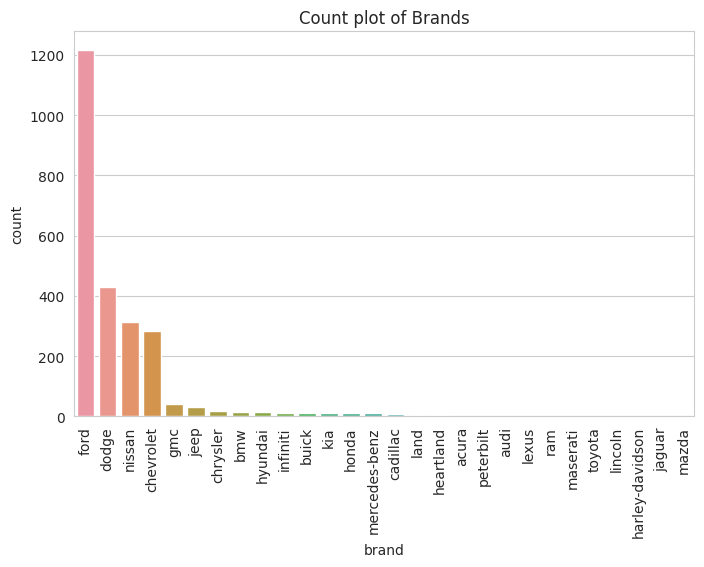

In [91]:
order = cars_df['brand'].value_counts().index
plt.figure(figsize=(8,5))
sns.countplot(cars_df, x ='brand', order=order).set(title='Count plot of Brands')
plt.xticks(rotation=90);

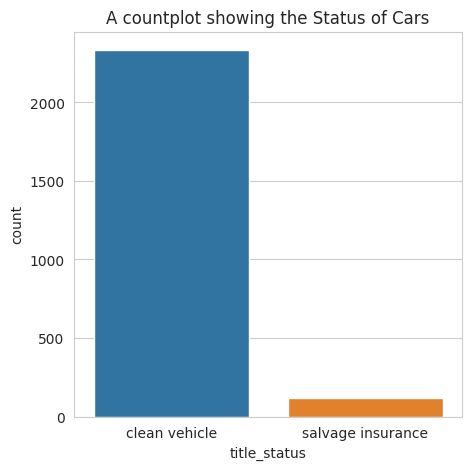

In [92]:
plt.figure(figsize=(5,5))
sns.countplot(cars_df, x ='title_status').set(title='A countplot showing the Status of Cars');

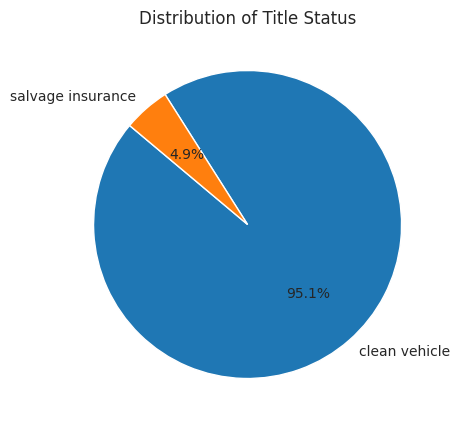

In [93]:
plt.figure(figsize=(5, 5))
plt.pie(cars_df['title_status'].value_counts(), labels=cars_df['title_status'].unique(), autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Title Status');

### Bivariate Analysis

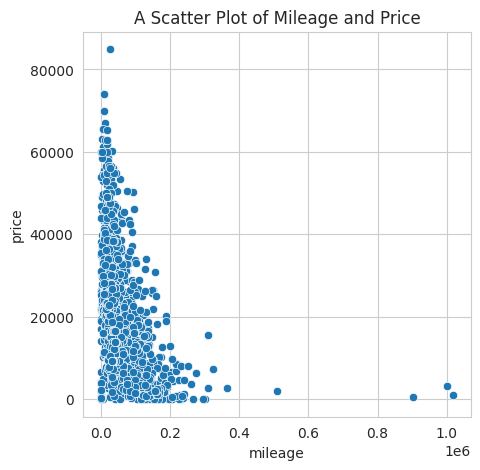

In [94]:
plt.figure(figsize=(5,5))
sns.scatterplot(cars_df, x='mileage', y='price').set(title='A Scatter Plot of Mileage and Price');

From the graph above, we can see that as the mileage of a car increases, the price of the car tends to decrease
And also we can say that most cars in the dataset has mileage between 0.0 and 2.2 which could indicate that cars
in the dataset are fairly new or driven less

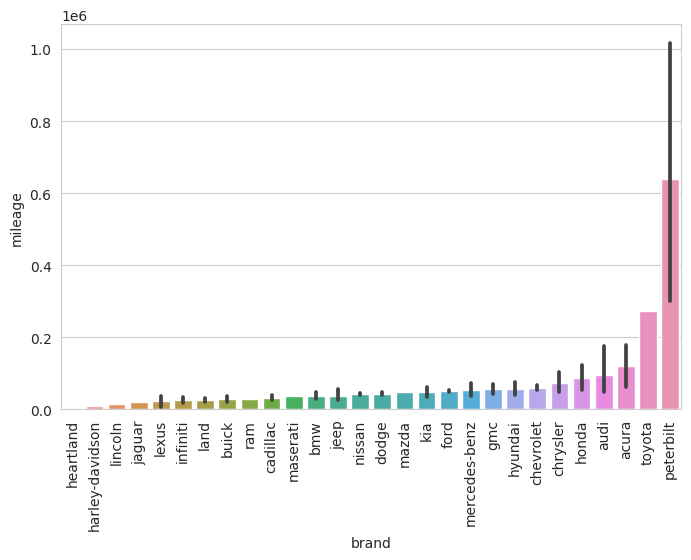

In [95]:
#Visualizing Brands and their mileage
#Grouping the dataset by brand and mileage and then sorting them for the order on the graph
order = cars_df.groupby('brand')['mileage'].mean().sort_values().index
plt.figure(figsize=(8,5))
sns.barplot(cars_df, x ='brand', y='mileage', order=order)
plt.xticks(rotation=90);

From the graphs Below and Above, a car like peterbilt had a higher mileage and the price of the car was really low as compared
to others with lower mileage

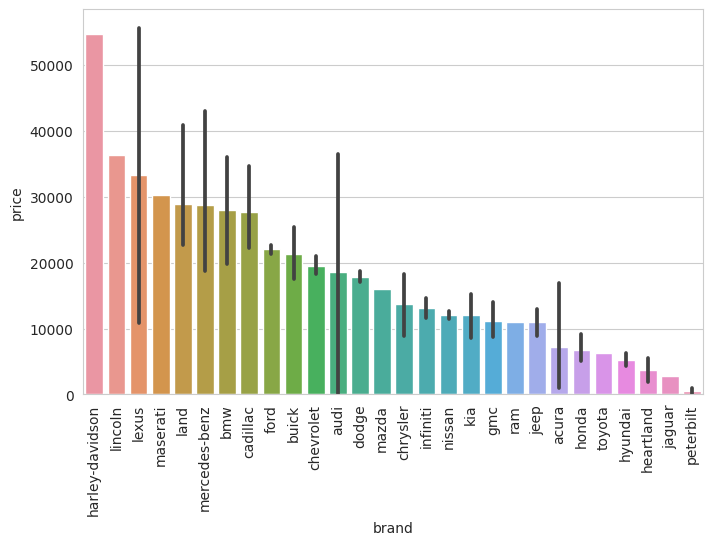

In [96]:
# Visualizing brands and the price
order = cars_df.groupby('brand')['price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(8,5))
sns.barplot(cars_df, x ='brand', y='price', order=order)
plt.xticks(rotation=90);

In [97]:
# Creating a new column "Brand_model_color"
cars_df['brand_model_color'] = cars_df['brand'] + '_' + cars_df['model'] + '_' + cars_df['color']

In [98]:
#Grouping and sorting the values by price and brand_model_color
order = cars_df.groupby('brand_model_color')['price'].mean().sort_values(ascending=False)
result_df = pd.DataFrame({'Brand_Model_Color': order.index, 'Price': order.values})
result_df

,Brand_Model_Color,Price
0,mercedes-benz_sl-class_silver,84900.0
1,ford_drw_no_color,72000.0
2,dodge_challenger_blue,67000.0
3,chevrolet_corvette_red,63200.0
4,chevrolet_corvette_white,62000.0
...,...,...
576,ford_pk_gray,25.0
577,chrysler_door_silver,25.0
578,jeep_door_black,25.0
579,audi_door_black,25.0


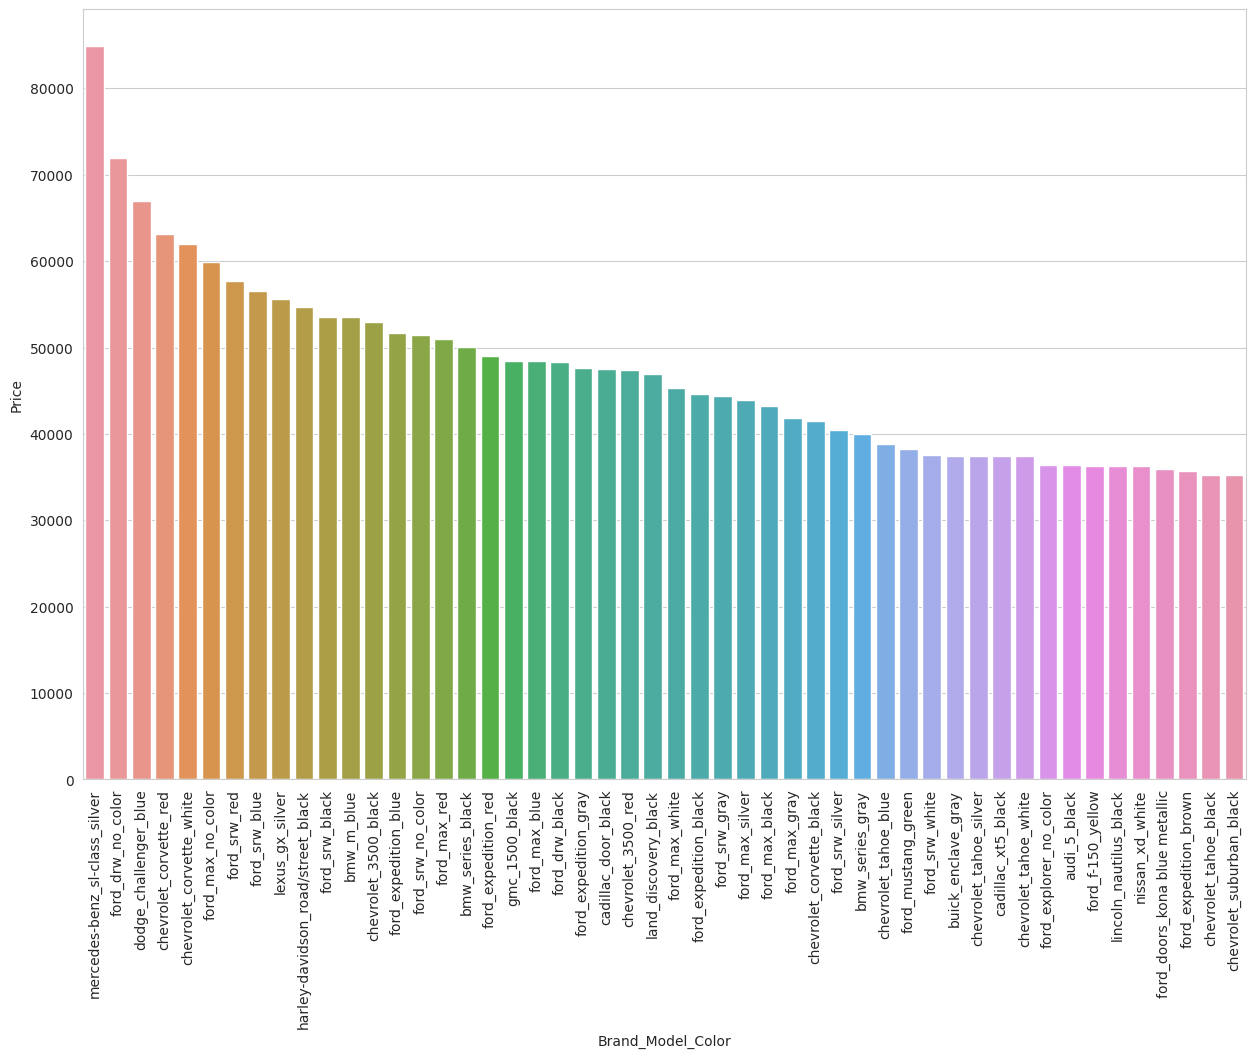

In [99]:
plt.figure(figsize=(15,10))
sns.barplot(result_df.head(50), x='Brand_Model_Color', y='Price')
plt.xticks(rotation=90)
plt.show()

# Preparing Data for The Model

In [100]:
#Dropping Columns that will not be needed for the prediction
cars_df.drop(columns=['model','color','vin', 'lot', 'state','brand_model_color'], axis=1, inplace=True)

In [101]:
# Convert the 'year' column back to integer for the age calculation
cars_df['year'] = cars_df['year'].astype(int)
# Changing the year column to a vehicle age column
current_year = datetime.datetime.now().year
cars_df['vehicle_age'] = current_year-cars_df['year']
cars_df.drop('year', axis =1, inplace=True)

In [102]:
# Function to extract hours from "condition" column
def extract_hours(condition_string):
    if 'days' in condition_string:
        days = int(condition_string.split()[0])
        return days * 24
    elif 'hours' in condition_string:
        return int(condition_string.split()[0])
    else:
        return 0

In [103]:
# Applying the function to the condition to create a new column called hours_left
cars_df['hours_left'] = cars_df['condition'].apply(extract_hours)

#Dropping the condition column
cars_df.drop('condition', axis=1, inplace=True)

In [104]:
#Encoding some features for the model using label Encoder
le = LabelEncoder()
cars_df['title_status'] = le.fit_transform(cars_df['title_status'].values)
cars_df['country'] = le.fit_transform(cars_df['country'].values)

In [105]:
#Checking the head of the dataframe
cars_df.head()

,price,brand,title_status,mileage,country,vehicle_age,hours_left
0,6300,toyota,0,274117.0,1,15,240
1,2899,ford,0,190552.0,1,12,144
2,5350,dodge,0,39590.0,1,5,48
3,25000,ford,0,64146.0,1,9,22
4,27700,chevrolet,0,6654.0,1,5,22


In [106]:
#Encoding the brand column with One Hot Encoder
encoder = OneHotEncoder(sparse=False)
brand_encoded = encoder.fit_transform(cars_df[['brand']])

# Create a DataFrame with the encoded features
brand_encoded_df = pd.DataFrame(brand_encoded, columns=encoder.get_feature_names_out(['brand']))
# Concatenate the one-hot encoded columns to the original DataFrame
cars_df = pd.concat([cars_df, brand_encoded_df], axis=1)
# Dropping the original brand from the dataset
cars_df.drop('brand', axis=1, inplace=True)

# Baseline Modeling

## Metrics used, their role and Importance
### Mean Absolute Error (MAE):
1. <b>What it means:</b> MAE represents, on average, how far off our car price predictions are from the actual prices.
2. <b>Intuitive explanation:</b> If our model has an MAE of $1,000, it means that, on average, our price predictions are off by $1,000.
3. <b>Why it's important:</b> MAE is easy to understand and interpret. It gives us a clear idea of the magnitude of our prediction errors in dollars. Lower MAE indicates better prediction accuracy.
### Root Mean Squared Error (RMSE):
1. <b>What it means:</b> RMSE is similar to MAE but puts more emphasis on larger errors.
2. <b>Intuitive explanation:</b> If our model has an RMSE of 10, it means that, on average, our predictions are off by 10 units of whatever we're measuring (e.g., dollars, miles).
3. <b>Why it's important:</b> RMSE helps us spot and penalize larger errors more significantly. It's useful when we want to give extra attention to big mistakes, which can be especially important when pricing high-value items like cars.
### R-squared (R²):
1. <b>What it means</b>: R² measures how well our model explains the variability in car prices.
2. <b>Intuitive explanation</b>: If our model has an R² of 0.85, it means that 85% of the variation in car prices is explained by our features, and the remaining 15% is unexplained.
3. <b>Why it's important:</b> R² helps us understand how much of the car price variation our model captures. A higher R² indicates that our model is doing a good job explaining price differences based on the given features. It's a valuable metric for assessing the overall goodness of fit.

In [107]:
# Splitting data into training and testing
X = cars_df.drop('price', axis=1)
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [108]:
# Standardizing the independent variables so that each can contribute equally to building the model
scaler = StandardScaler()

# fitting the scaler on the variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Creating a List to store models and their scores
model_score_list = []

### Ridge RegressionCv

In [110]:
ridge = RidgeCV()
#fitting model on the training set
ridge.fit(X_train, y_train)
# making predictions with the model
ridge_pred = ridge.predict(X_test)

In [111]:
# Looking at the performance of the model
mae_ridge = round(mean_absolute_error(y_test, ridge_pred),3)
rmse_ridge = round(mean_squared_error(y_test, ridge_pred, squared=False),3)
r2_ridge = round(r2_score(y_test, ridge_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_ridge)
print('Mean_Squared_Error: ',rmse_ridge)
print('R2_Score: ', r2_ridge)
model_score_list.append({'model_name':'Ridge Regression','mean_absolute_error':mae_ridge, 'root_mean_squared_error':rmse_ridge,
                        'r2_score':r2_ridge})

Mean_Absolute_Error:  7526.312
Mean_Squared_Error:  10423.612
R2_Score:  0.268


## Lasso Regression

In [112]:
lasso = LassoCV()
#fitting model on the training set
lasso.fit(X_train, y_train)
# making predictions with the model
lasso_pred = lasso.predict(X_test)

In [113]:
# Looking at the performance of the model
mae_lasso = round(mean_absolute_error(y_test, lasso_pred),3)
rmse_lasso = round(mean_squared_error(y_test, lasso_pred, squared=False),3)
r2_lasso = round(r2_score(y_test, lasso_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_lasso)
print('Mean_Squared_Error: ',rmse_lasso)
print('R2_Score: ', r2_lasso)
model_score_list.append({'model_name':'Lasso Regression','mean_absolute_error':mae_lasso, 'root_mean_squared_error':rmse_lasso,
                        'r2_score':r2_lasso})

Mean_Absolute_Error:  7553.339
Mean_Squared_Error:  10442.911
R2_Score:  0.265


### Linear Regression

In [114]:
lr = LinearRegression()
# Fitting models on the training data
lr.fit(X_train, y_train)
# predicting and evaluating models
lr_pred = lr.predict(X_test)

In [115]:
# Looking at the performance of the model
mae_lr = round(mean_absolute_error(y_test, lr_pred),3)
rmse_lr = round(mean_squared_error(y_test, lr_pred, squared=False),3)
r2_lr = round(r2_score(y_test, lr_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_lr)
print('Mean_Squared_Error: ',rmse_lr)
print('R2_Score: ', r2_lr)
model_score_list.append({'model_name':'linear_regression','mean_absolute_error':mae_lr, 'root_mean_squared_error':rmse_lr,
                        'r2_score':r2_lr})

Mean_Absolute_Error:  2139296461095600.2
Mean_Squared_Error:  2.1199553627736976e+16
R2_Score:  -3.027071123094387e+24


### Support Vector Regressor

In [116]:
svr = SVR()
# Fitting models on the training data
svr.fit(X_train, y_train)
# predicting and evaluating models
svr_pred = svr.predict(X_test)

In [117]:
# Looking at the performance of the model
mae_svr = round(mean_absolute_error(y_test, svr_pred),3)
rmse_svr = round(mean_squared_error(y_test, svr_pred, squared=False),3)
r2_svr = round(r2_score(y_test, svr_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_svr)
print('Mean_Squared_Error: ',rmse_svr)
print('R2_Score: ', r2_svr)
model_score_list.append({'model_name':'support_vector_regressor','mean_absolute_error':mae_svr, 'root_mean_squared_error':rmse_svr,
                        'r2_score':r2_svr})

Mean_Absolute_Error:  9149.264
Mean_Squared_Error:  12396.965
R2_Score:  -0.035


### Random Forest Regressor

In [118]:
rf = RandomForestRegressor()
# Fitting models on the training data
rf.fit(X_train, y_train)
# predicting and evaluating models
rf_pred = rf.predict(X_test)

In [119]:
# Looking at the performance of the model
mae_rf = round(mean_absolute_error(y_test, rf_pred),3)
rmse_rf = round(mean_squared_error(y_test, rf_pred, squared=False),3)
r2_rf = round(r2_score(y_test, rf_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_rf)
print('Mean_Squared_Error: ',rmse_rf)
print('R2_Score: ', r2_rf)
model_score_list.append({'model_name':'random_forest_regressor','mean_absolute_error':mae_rf, 'root_mean_squared_error':rmse_rf,
                        'r2_score':r2_rf})

Mean_Absolute_Error:  6953.763
Mean_Squared_Error:  9797.835
R2_Score:  0.353


In [120]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'mean_absolute_error', 'root_mean_squared_error'
                                                        ,'r2_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values('mean_absolute_error').reset_index(drop=True)

,model_name,mean_absolute_error,root_mean_squared_error,r2_score
0,random_forest_regressor,6.953763e+03,9.797835e+03,3.530000e-01
1,Ridge Regression,7.526312e+03,1.042361e+04,2.680000e-01
2,Lasso Regression,7.553339e+03,1.044291e+04,2.650000e-01
3,support_vector_regressor,9.149264e+03,1.239697e+04,-3.500000e-02
4,linear_regression,2.139296e+15,2.119955e+16,-3.027071e+24


## Using GridSearchCV to perform Cross Validation and hyperparameters tuning for top 3 models

In [121]:
new_model_score_list = []

# Creating an instance of RepeatedKfold for Cross Validation
cv = RepeatedKFold(n_splits=8, n_repeats=5, random_state=0)

### Ridge Regression

In [122]:
# Tuning the parameter of of Ridge Regression
ridge = RidgeCV(alphas=np.arange(0.1,10,0.1), cv=cv, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)

# Making predictions with the model
pred = ridge.predict(X_test)

In [123]:
# Looking at the performance of the model
mae_ridge = round(mean_absolute_error(y_test, pred),3)
rmse_ridge = round(mean_squared_error(y_test, pred, squared=False),3)
r2_ridge = round(r2_score(y_test, pred),3)


#Printing the metrics
print('Mean_Absolute_Error: ',mae_ridge)
print('Mean_Squared_Error: ',rmse_ridge)
print('R2_Score: ', r2_ridge)
new_model_score_list.append({'model_name':'Ridge_regression','mean_absolute_error':mae_ridge, 'root_mean_squared_error':rmse_ridge,
                        'r2_score':r2_ridge})

Mean_Absolute_Error:  7526.321
Mean_Squared_Error:  10423.616
R2_Score:  0.268


### Lasso Regression

In [124]:
# Tuning the parameter of of Lasso Regression
lasso = LassoCV(alphas=np.arange(0.1,10,0.1), cv=cv, tol=2)
lasso.fit(X_train, y_train)

# Making predictions with the model
pred_lasso = lasso.predict(X_test)

In [125]:
# Looking at the performance of the model
mae_lasso = round(mean_absolute_error(y_test, pred_lasso),3)
rmse_lasso = round(mean_squared_error(y_test, pred_lasso, squared=False),3)
r2_lasso = round(r2_score(y_test, pred_lasso),3)


#Printing the metrics
print('Mean_Absolute_Error: ',mae_lasso)
print('Mean_Squared_Error: ',rmse_lasso)
print('R2_Score: ', r2_lasso)
new_model_score_list.append({'model_name':'Lasso_regression','mean_absolute_error':mae_lasso, 'root_mean_squared_error':rmse_lasso,
                        'r2_score':r2_lasso})

Mean_Absolute_Error:  7768.792
Mean_Squared_Error:  10711.678
R2_Score:  0.227


### Random Forest

In [ ]:
param_rf = {
    'n_estimators': np.arange(10, 100, 5),
    'max_features': ['sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 2),
}
# Create GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_rf,
                                      scoring='neg_mean_absolute_error', cv=cv)
# Fitting the search algorithm on the training data
grid_search_rf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Assigning the best estimator to a new model
rf = grid_search_rf.best_estimator_
# predicting and evaluating models
rf_pred = rf.predict(X_test)

In [ ]:
# Looking at the performance of the model
mae_rf = round(mean_absolute_error(y_test, rf_pred),3)
rmse_rf = round(mean_squared_error(y_test, rf_pred, squared=False),3)
r2_rf = round(r2_score(y_test, rf_pred),3)
#Printing the metrics
print('Mean_Absolute_Error: ',mae_rf)
print('Mean_Squared_Error: ',rmse_rf)
print('R2_Score: ', r2_rf)
new_model_score_list.append({'model_name':'random_forest_regressor','mean_absolute_error':mae_rf, 'root_mean_squared_error':rmse_rf,
                        'r2_score':r2_rf})

In [ ]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(new_model_score_list,columns=['model_name', 'mean_absolute_error', 'root_mean_squared_error'
                                                        ,'r2_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values('mean_absolute_error').reset_index(drop=True)

## Conclusion

<p> After analysis, we found out that price, brand, title_status, mileage, country, vehicle_age and hours_left <br>are great determinants of the prices of cars</p>
<p> Three models were used, Linear Regression, Support Vector Regressor and Random Forest Regressor. After training, <br> testing and using RandomizedSearchCV to find the best model based on hyperparameter tuning, it was found that Random Forest Regressor produced  <br>is the best model since it was able give us lower root mean squared error, mean absolute error and also gave a higher r2 score.<br> So we can conclude that the best model for this prediction is Random Forest Regressor